INFO:DT:Loaded homography for dori


(480, 640, 3)
[[    0.           676.08392334   917.40618896  2050.41821289]
 [  211.45050049   822.78125      818.50994873     0.        ]]
WARP PERSPECTIVE TOOK: seconds
0.00216698646545


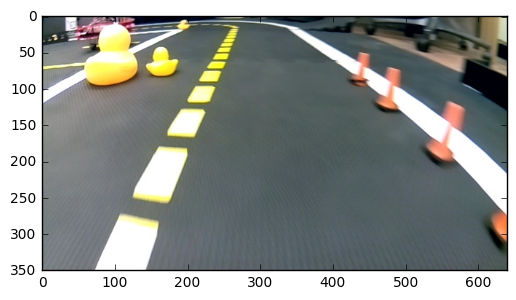

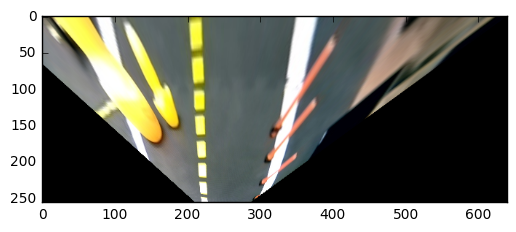

White filtered img


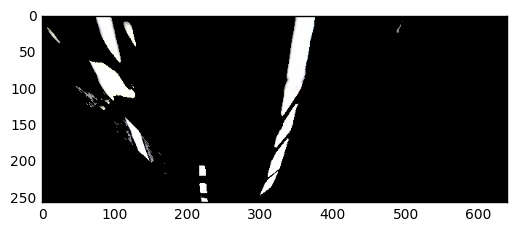

Orange filtered img


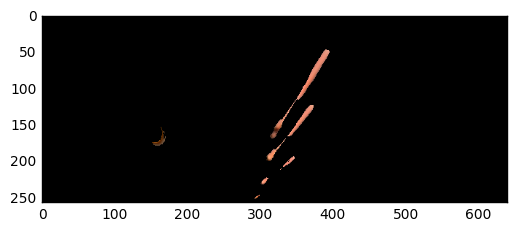

Yellow filtered img


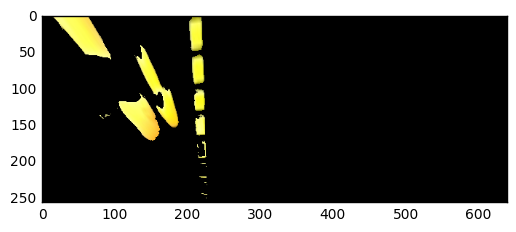

NORMAL ALGORITHMS STARTS:
THRESHOLDING IMAGE TOOK: seconds
0.000397205352783


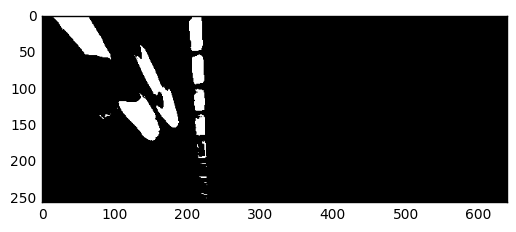

THRESHOLDING IMAGE AGAIN TOOK: seconds
0.000329971313477


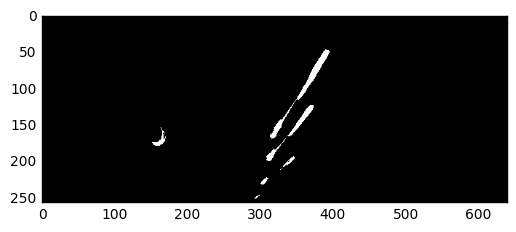

VERUNDGUNG BEIDE BILDER TOOK:
0.000598907470703
COMBINED PICTURE


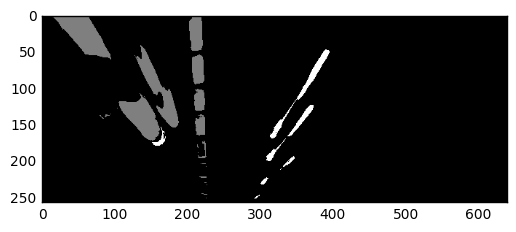

SEGMENTING IMAGE TOOK: seconds
0.00114893913269
REGIONPROPS TOOK: seconds
0.000967979431152


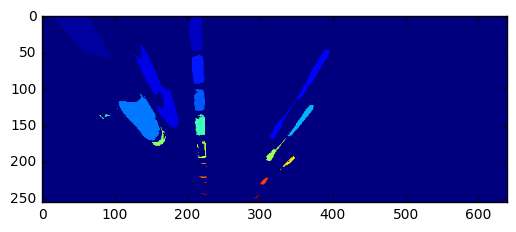

640.131
NEW OBJECT
PERIMETER IS:
234.379725677
MAJOR AXIS
87.4590088593
1.33994044029
THATS THE LINE
21
!!!!!!!!!!!!!!!!!BEHIND A LINE!!!!!!!!!!!!!!!!!!111
(4, 2)
(1, 4, 2)
(2, 4)
NEW OBJECT
PERIMETER IS:
124.04163056
MAJOR AXIS
53.7146330723
1.1546353709
THATS THE LINE
0
(4, 2)
(1, 4, 2)
(2, 4)
NEW OBJECT
PERIMETER IS:
326.119841047
MAJOR AXIS
130.010583759
1.2542049717
THATS THE LINE
27
!!!!!!!!!!!!!!!!!BEHIND A LINE!!!!!!!!!!!!!!!!!!111
(4, 2)
(1, 4, 2)
(2, 4)
NEW OBJECT
PERIMETER IS:
102.04163056
MAJOR AXIS
43.0988779964
1.18380843428
THATS THE LINE
0
(4, 2)
(1, 4, 2)
(2, 4)
NEW OBJECT
PERIMETER IS:
85.4558441227
MAJOR AXIS
31.8460917154
1.34170065336
THATS THE LINE
0
(4, 2)
(1, 4, 2)
(2, 4)
NEW OBJECT
PERIMETER IS:
198.208152802
MAJOR AXIS
68.9027090634
1.43831901166
THATS THE LINE
8
!!!!!!!!!!!!!!!!!BEHIND A LINE!!!!!!!!!!!!!!!!!!111
(4, 2)
(1, 4, 2)
(2, 4)
NEW OBJECT
PERIMETER IS:
117.681240867
MAJOR AXIS
58.4258369376
1.00709931629
THATS THE LINE
0
(4, 2)
(1, 4, 2)
(2, 4)
NEW O

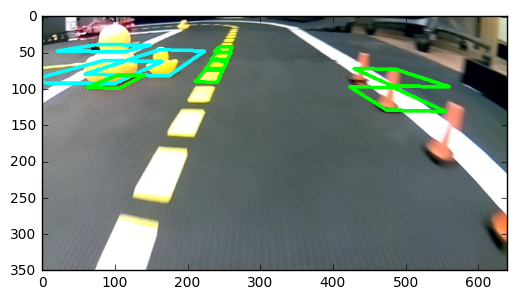

[10 15]


In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
from skimage import measure
from duckietown_utils import load_map, load_camera_intrinsics, load_homography, rectify
from numpy.linalg import inv
#doing obstacle detection exploiting the color and an inverse homography such that all objects keep their basic size!
#improvements: more restrictive yellow filter
#decision if duckie or not done by size only since the ducks are not a flat object on the plane that is why they are
#significantly larger!!!
#the transformation has to be validated under other homographies



H = load_homography('dori')
#print H
#print np.dot(H, [600,600,1])
filename = '/home/niggi/savior_bags/21.12./Record6/8_pics/417.jpg'
im1 = cv2.imread(filename) #reads BGR
print np.shape(im1)
im1_cropped = im1[130:,:,:]
im1_orig=np.copy(im1_cropped)
#plt.imshow(im1_cropped); plt.show()

#NEW PAR7
#COLOR THRESHOLDS
lower_white = np.array([0,0,150])
upper_white = np.array([255,25,255])
hsv = cv2.cvtColor(im1_cropped, cv2.COLOR_BGR2HSV)

lower_orange = np.array([5,100,50])
upper_orange = np.array([15,255,255])

#lower_orange = np.array([170,100,100])
#upper_orange = np.array([180,255,255])


lower_yellow = np.array([20,100,150]) 
upper_yellow = np.array([35, 255, 255])


#STUFF FOR TRANSFORMING THE IMAGE
x0=0
x1=640
y0=50
y1=350
pts1 = np.float32([[x0,y0],[x0,y1],[x1,y1],[x1,y0]])
pts1_h = np.float32([[x0,y0+130,1],[x0,y1+130,1],[x1,y1+130,1],[x1,y0+130,1]])
#add the crop offset to being able to calc real world coordinates correctly!!!
pts2_h = np.dot(H,np.transpose(pts1_h))

pts2 = np.float32((pts2_h[0:2,:]/pts2_h[2,:]*1000))
maximum_height = np.max([pts2[0,:]])
maximum_left = np.max([pts2[1,:]])
#print pts2
#determine points number 2!!!


pts2 = np.flipud(np.float32((np.float32([[maximum_height],[maximum_left]])-pts2)))
print pts2
max_x = int(np.max(pts2[0]))
factor_x = 640.0/max_x
max_y = int(np.max(pts2[1]))
factor_y = 300.0/max_y
pts2 = pts2*np.float32([[factor_x],[factor_x]])
#flipud only cause world frame is flipped,..

M = cv2.getPerspectiveTransform(pts1,np.transpose(pts2))
inv_M = inv(M)

start = time.time()
im_test = cv2.warpPerspective(im1_cropped,M,(int(np.max(pts2[0])),int(np.max(pts2[1])))) #for dori
end = time.time()
print "WARP PERSPECTIVE TOOK: seconds"
print(end - start)
#im_test = cv2.warpPerspective(im1_cropped,M,(3000,1280)) # for arki
plt.imshow(im1_cropped[:,:,::-1]); plt.show()
plt.imshow(im_test[:,:,::-1]); plt.show()
#This is the birds perspective view!


#BREITE DER ENTE EVT AUSNUTZEN!!! oder evt: breite der breitesten stelle vs breite der schmalsten oder so^^
# Convert BGR to HSV
hsv = cv2.cvtColor(im_test, cv2.COLOR_BGR2HSV)


# Threshold the HSV image to get only blue colors
start = time.time()
print "White filtered img"
mask_trala = cv2.inRange(hsv, lower_white, upper_white)
end = time.time()
res = cv2.bitwise_and(im_test,im_test, mask= mask_trala)
plt.imshow(res[:,:,::-1]); plt.show()

start = time.time()
print "Orange filtered img"
mask_trala = cv2.inRange(hsv, lower_orange, upper_orange)
end = time.time()
res = cv2.bitwise_and(im_test,im_test, mask= mask_trala)
plt.imshow(res[:,:,::-1]); plt.show()

start = time.time()
print "Yellow filtered img"
mask_trala = cv2.inRange(hsv, lower_yellow, upper_yellow)
end = time.time()
res = cv2.bitwise_and(im_test,im_test, mask= mask_trala)
plt.imshow(res[:,:,::-1]); plt.show()

print "NORMAL ALGORITHMS STARTS:"




#FILTER IMAGE
#old values:
#lower_yellow = np.array([20,75,100])
#upper_yellow = np.array([40,255,255])

#new, best values:

#to detect cones
#lower_yellow = np.array([0,80,80])
#upper_yellow = np.array([22, 255,255])

# Threshold the HSV image to get only blue colors
start = time.time()
mask1 = cv2.inRange(hsv, lower_yellow, upper_yellow)
end = time.time()
print "THRESHOLDING IMAGE TOOK: seconds"
print(end - start)
plt.imshow(mask1, cmap='gray'); plt.show()
#res = cv2.bitwise_and(grayscale,grayscale, mask= mask1)
#print np.max(res)

#NEW PART

# Threshold the HSV image to get only blue colors
start = time.time()
mask2 = cv2.inRange(hsv, lower_orange, upper_orange)
end = time.time()
print "THRESHOLDING IMAGE AGAIN TOOK: seconds"
print(end - start)
plt.imshow(mask2, cmap='gray'); plt.show()

start = time.time()
mask = np.bitwise_or((mask1/2),mask2)
#mask = mask1
end = time.time()
print "VERUNDGUNG BEIDE BILDER TOOK:"
print (end-start)
print "COMBINED PICTURE"
plt.imshow(mask, cmap='gray'); plt.show()
#show "yellow-filtered image

#--------------------SEGMENT AND EVALUATE-----------------------------------------------------------------

#ÜBERPRÜFUNG OB NACH GELBFILTER WAS ÜBRIGGEBLIEBEN IST:
if(np.sum(mask)!=0):
    
    start = time.time()
    final=measure.label(mask)
    end = time.time()
    print "SEGMENTING IMAGE TOOK: seconds"
    print(end - start)
    
    #NOT WORKING NOW
    #start = time.time()
    #print np.shape(final)
    #abc=measure.perimeter(erf,neighbourhood=8)
    #end = time.time()
    #print "PERIMETER TOOK: seconds"
    #print(end - start)
    
    
    start = time.time()
    props=measure.regionprops(final,mask)
    end = time.time()
    print "REGIONPROPS TOOK: seconds"
    print(end - start)
    plt.imshow(final); plt.show()
    
    i=np.max(final)
    
    #-----------------------FILTER MUSS TIEFENABHÄNGIG WERDEN!!!-------------------------------------------
    print np.max(pts2[0])
    start = time.time()
    for k in range(1,i+1): #durch alle zahlen durchiterieren
        #first only keep large elements then eval their shape
        #if (props[k-1]['area']>100 and (props[k-1]['extent']<0.2 or (abs(props[k-1]['orientation'])>1.2) and props[k-1]['minor_axis_length']<10)):
        #if (props[k-1]['area']>100 and (props[k-1]['extent']<0.2 or (0.5*props[k-1]['perimeter']/props[k-1]['major_axis_length']<1.2))):
        if (props[k-1]['area']>50 and 0.5*props[k-1]['perimeter']/props[k-1]['major_axis_length']>1.0): 
            #gerade: mehr pixel als breite -> muss noch besser werden! (bei dori 2000 optimal,...)
            #skip all those who were merged away or have not enough pixels tiefenabh???
            #DIE BREITE MUSS ICH AUF DER GLEICHEN HÖHE NEHMEN!!!!!!
            #B=np.copy(final)
            #B[(B != k)]=0
            #plt.imshow(B); plt.show
            #C=np.nonzero(B)
            #C = np.where(final==k)
            #C = final[final==k]
            print "NEW OBJECT"
            
            top=props[k-1]['bbox'][0]
            bottom=props[k-1]['bbox'][2]
            left=props[k-1]['bbox'][1]
            right=props[k-1]['bbox'][3]
            print "PERIMETER IS:"
            print props[k-1]['perimeter']
            print "MAJOR AXIS"
            print props[k-1]['major_axis_length']
            print 0.5*props[k-1]['perimeter']/props[k-1]['major_axis_length']
            
            #TRY TO LOOK WHETHER THERE IS WHITE IN BETWEEN
            #calc center in top view image
            center_x = 250
            center_y = 250
            #print "THATS THE LINE"
            #line =  measure.profile_line(final, (center_x,center_y), (bottom,left), linewidth=1, order=1, mode='constant')
            #print line
            print "THATS THE LINE"
            line1 =  np.array([measure.profile_line(hsv, (center_y,center_x), (top,left+0.5*(left-right)), linewidth=1, order=1, mode='constant')])
            #bottom,left
            line1 =  cv2.inRange(line1, lower_white, upper_white)
            summe = np.sum(line1==255)
            print summe
            if (summe>3):
                print "!!!!!!!!!!!!!!!!!BEHIND A LINE!!!!!!!!!!!!!!!!!!111"
            
            #line1 =  np.array([measure.profile_line(grayscale, (center_x,center_y), (bottom,left), linewidth=1, order=1, mode='constant')])
            #print line1
            #print np.max(line1)
            #mask = cv2.inRange(line1, lower_white, upper_white)
            #print mask
            #plt.imshow(line1); plt.show()
            #plt.imshow(hsv);plt.show()
            #plt.imshow(mask,cmap='gray'); plt.show()
            
            
            #transform points back
            points = np.float32([[left,top],[left,bottom],[right,bottom],[right,top]])
            print np.shape(points)
            points = np.array([points])
            print np.shape(points)
            trans_points = np.float32(cv2.perspectiveTransform(points,inv_M))
            pts = np.concatenate((np.reshape(trans_points[:,:,0],(1,-1)), np.reshape(trans_points[:,:,1],(1,-1))), axis=0)
            print np.shape(pts)
            if (np.max(line1)>180):
                cv2.polylines(im1_cropped,np.int32([np.transpose(pts)]),True,(255,255,0),3)
            else:
                cv2.polylines(im1_cropped,np.int32([np.transpose(pts)]),True,(0,255,0),3)
            #cv2.rectangle(im_test,(left,top),(right,bottom),(0,255,0),3)

    #eig box np.min breite und höhe!! if they passed the test!!!!
    #print abc
    end = time.time()
    print "ITERATING THROUGH TOOK: s"
    print(end - start)
    #plt.imshow(final); plt.show()
#last_img=np.concatenate((im1_orig[:,:,::-1],im1_cropped[:,:,::-1]),axis=1)
#plt.imshow(last_img); plt.show()
plt.imshow(im1_cropped[:,:,::-1]); plt.show()
#just warp image back,...
#im_test = cv2.warpPerspective(im_test,inv_M,(650,340)) #for dori
#plt.imshow(im_test); plt.show()


point_calc=np.zeros((3,2),dtype=np.float)
point_calc=np.array([[10,15],[20,30],[1,1]])
print point_calc[0,:]

In [ ]:
conv = cv2.cvtColor(funky_rgb, cv2.COLOR_RGB2BGR)
cv2.imwrite( 'data/funky_rgb.png', conv)